Columns detected: Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')
Using columns -> Region: state, Sales: sales, Product: productline

Total Sales by Region:
 state
CA               1505542.23
MA                666443.72
NY                646343.76
NSW               305567.11
PA                273327.27
Victoria          265586.87
CT                238661.28
BC                149873.77
NH                131685.30
Tokyo             120562.74
NJ                 83228.19
NV                 82751.08
Isle of Wight      78240.84
Quebec             74204.79
Osaka              67605.07
Queensland         59469.12
Name: sales, dtype: float64


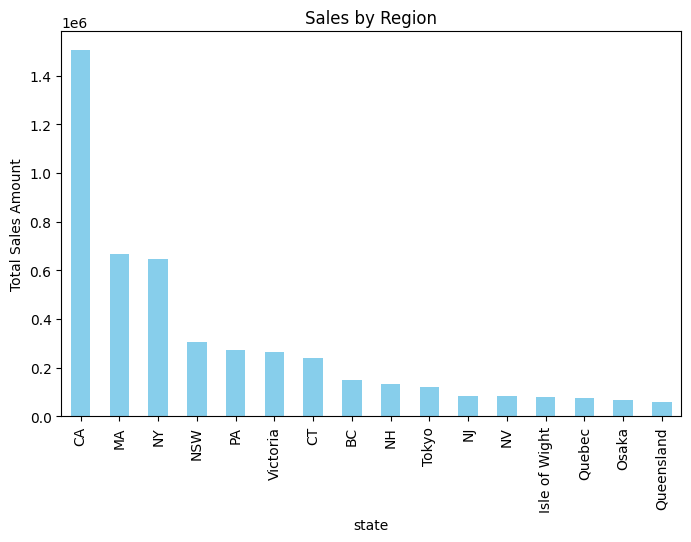

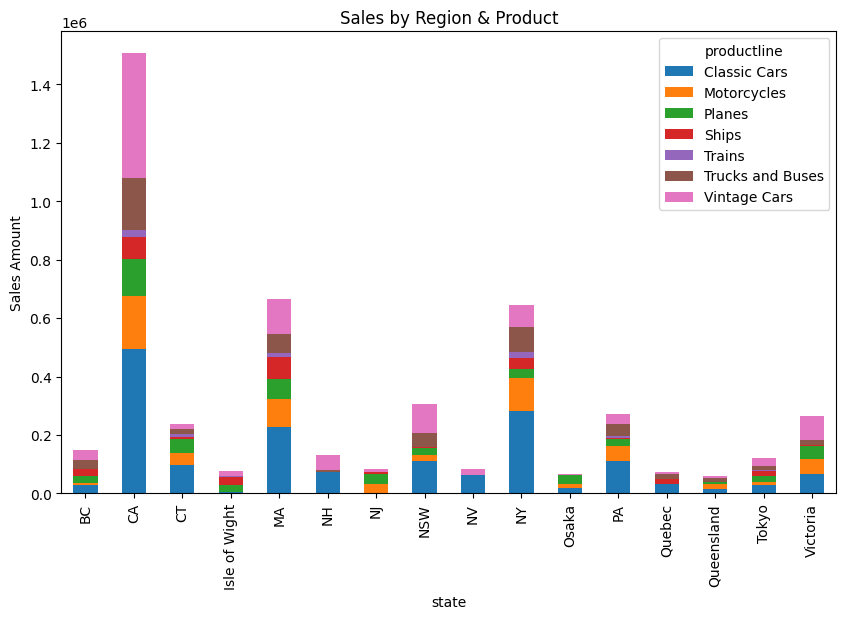

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV safely with encoding fallback
try:
    df = pd.read_csv("sales_data_sample 2.csv", encoding='utf-8')
except:
    df = pd.read_csv("sales_data_sample 2.csv", encoding='latin1')

# Clean column names: remove spaces and lowercase
df.columns = df.columns.str.strip().str.lower()
print("Columns detected:", df.columns)

# Automatic column detection
region_col = next((col for col in df.columns if 'region' in col or 'state' in col or 'area' in col or 'zone' in col), None)
sales_col = next((col for col in df.columns if 'sales' in col or 'amount' in col or 'revenue' in col or 'total' in col), None)
product_col = next((col for col in df.columns if 'product' in col or 'category' in col or 'item' in col), None)

if not region_col or not sales_col or not product_col:
    raise ValueError("Could not automatically detect region, sales, or product columns. Check column names.")

print(f"Using columns -> Region: {region_col}, Sales: {sales_col}, Product: {product_col}")

# Aggregate total sales by region
sales_region = df.groupby(region_col)[sales_col].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:\n", sales_region)

# Plot total sales by region
sales_region.plot(kind='bar', color='skyblue', figsize=(8,5), title='Sales by Region')
plt.ylabel('Total Sales Amount')
plt.show()

# Aggregate sales by region and product
sales_region_product = df.groupby([region_col, product_col])[sales_col].sum().unstack(fill_value=0)

# Stacked bar plot
sales_region_product.plot(kind='bar', stacked=True, figsize=(10,6), title='Sales by Region & Product')
plt.ylabel('Sales Amount')
plt.show()
